# **Introduction**


In [0]:
from __future__ import print_function, division
from builtins import range, input
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from glob import glob

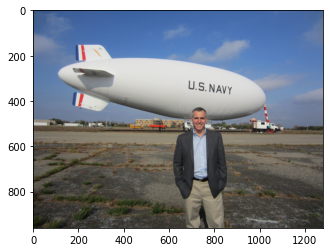

In [2]:
%matplotlib inline
plt.imshow(image.load_img('airship.jpg'))
plt.show()

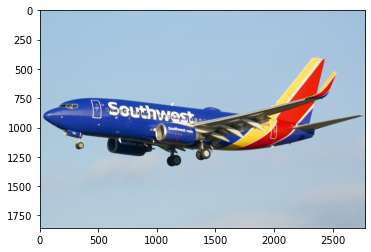

In [3]:
plt.imshow(image.load_img('airliner.jpg'))
plt.show()

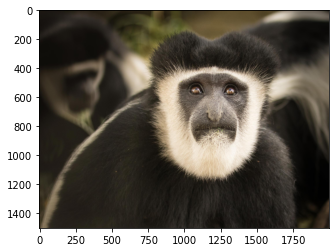

In [4]:
plt.imshow(image.load_img('colobus-monkey.jpg'))
plt.show()

# **Load the Resnet50 Model**

In [4]:
# add preprocessing layer to the front of VGG
resnet = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=True)


# view the structure of the model

resnet.summary()

102973440/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
________________________

# **Build a Model which outputs the last activation layer**

In [0]:
# make a model to get output before flatten
activation_layer = resnet.get_layer('conv5_block3_out')

# create a model object
model = Model(inputs=resnet.input, outputs=activation_layer.output)

# get the feature map weights
final_dense = resnet.get_layer('predictions')
W = final_dense.get_weights()[0]

In [6]:
len(W)

2048

# **Build a Pipeline that builds the Activation Map**

In [0]:
def show_class_activation_map(im):
    img = image.load_img((im), target_size=(224, 224))
    x = preprocess_input(np.expand_dims(img, 0))
    fmaps = model.predict(x)[0] # 7 x 7 x 2048

    # get predicted class
    probs = resnet.predict(x)
    classnames = decode_predictions(probs)[0]
    print(classnames)
    classname = classnames[0][1]
    pred = np.argmax(probs[0])

    # get the 2048 weights for the relevant class
    w = W[:, pred]

    # "dot" w with fmaps
    cam = fmaps.dot(w)

    # upsample to 224 x 224
    # 7 x 32 = 224
    cam = sp.ndimage.zoom(cam, (32, 32), order=1)

    plt.subplot(1,2,1)
    plt.imshow(img, alpha=0.8)
    plt.imshow(cam, cmap='jet', alpha=0.5)
    plt.subplot(1,2,2)
    plt.imshow(img)
    plt.title(classname, size=20)
    plt.show()


In [0]:
plt.rcParams['figure.figsize'] = [15, 15]

[('n02692877', 'airship', 0.9962018), ('n02690373', 'airliner', 0.003227415), ('n03773504', 'missile', 0.00018964229), ('n04552348', 'warplane', 0.00013133897), ('n04118538', 'rugby_ball', 6.9624526e-05)]


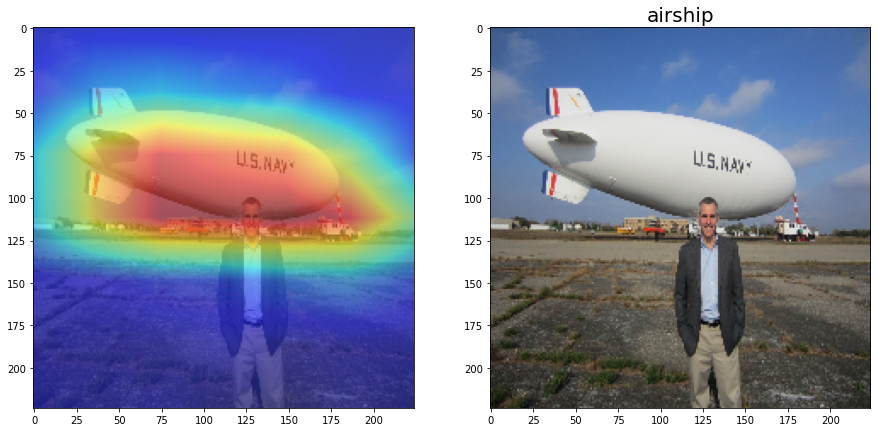

In [62]:
show_class_activation_map("airship.jpg")

[('n02690373', 'airliner', 0.96595055), ('n04592741', 'wing', 0.032552645), ('n04552348', 'warplane', 0.00096167135), ('n02692877', 'airship', 0.0003353646), ('n03888257', 'parachute', 6.165479e-05)]


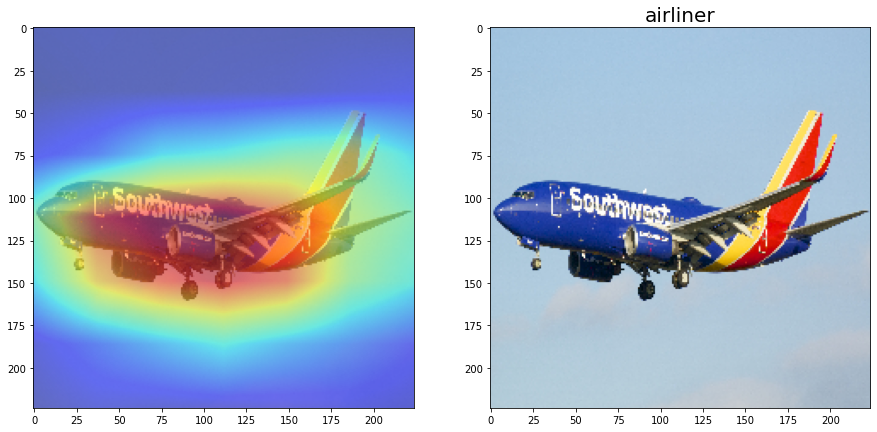

In [46]:
show_class_activation_map("airliner.jpg")

[('n02769748', 'backpack', 0.19744585), ('n04325704', 'stole', 0.09535628), ('n04370456', 'sweatshirt', 0.08771422), ('n03594734', 'jean', 0.081774004), ('n03888257', 'parachute', 0.05919225)]


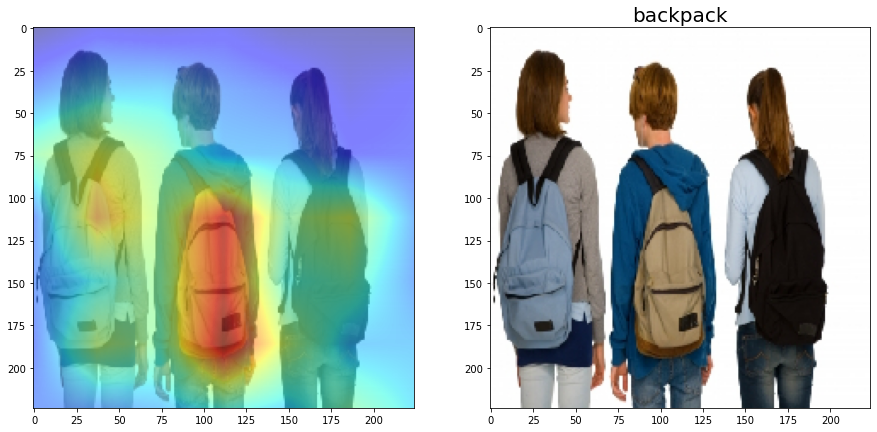

In [58]:
show_class_activation_map("back_pack.jpg")

[('n02965783', 'car_mirror', 0.24144353), ('n03782006', 'monitor', 0.17839248), ('n04356056', 'sunglasses', 0.15912136), ('n04404412', 'television', 0.14077891), ('n04355933', 'sunglass', 0.09264629)]


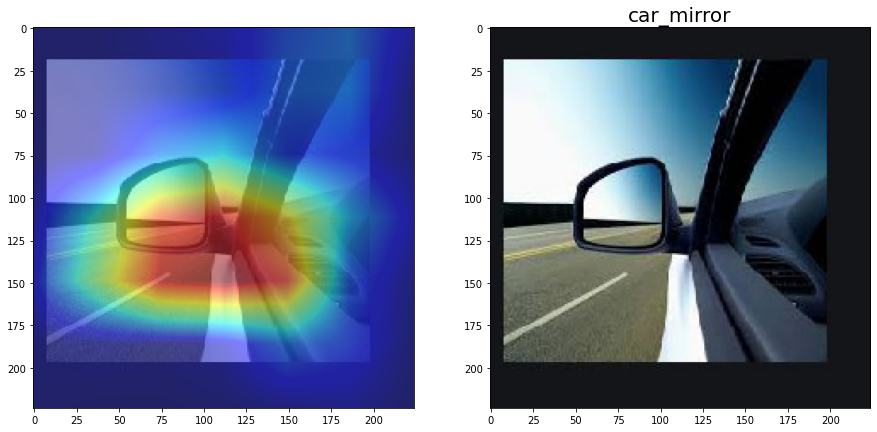

In [57]:
show_class_activation_map("car_mirror.JPG")

[('n02117135', 'hyena', 0.991245), ('n02116738', 'African_hunting_dog', 0.008654231), ('n02115913', 'dhole', 5.4501237e-05), ('n02091134', 'whippet', 1.2828206e-05), ('n02130308', 'cheetah', 1.0306023e-05)]


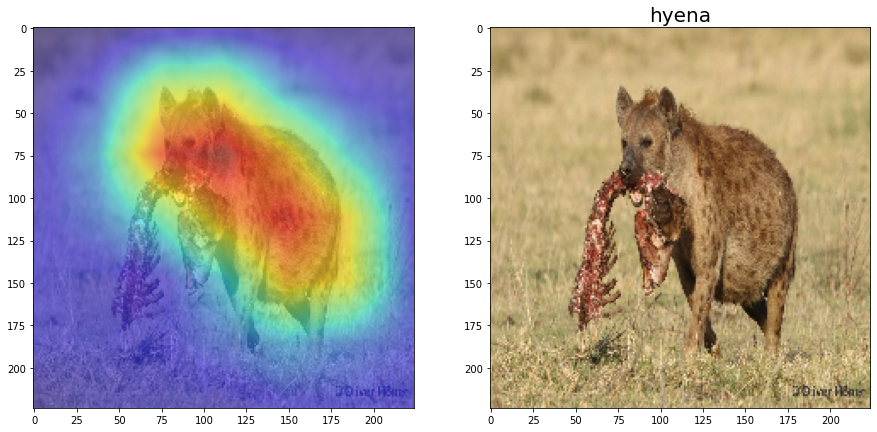

In [48]:
show_class_activation_map("hyena.jpg")

[('n02117135', 'hyena', 0.96959454), ('n02116738', 'African_hunting_dog', 0.030400423), ('n02130308', 'cheetah', 2.8150619e-06), ('n02127052', 'lynx', 2.839291e-07), ('n02114855', 'coyote', 2.8360492e-07)]


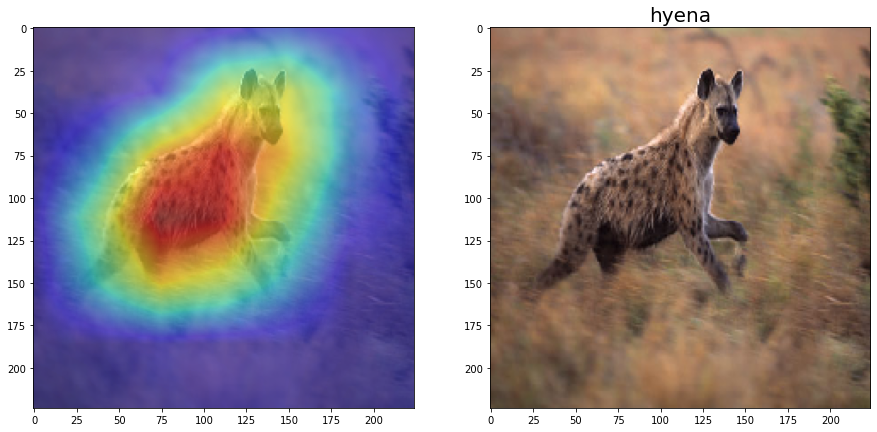

In [49]:
show_class_activation_map("hyena_11.jpg")

[('n02835271', 'bicycle-built-for-two', 0.8206805), ('n04482393', 'tricycle', 0.038136277), ('n02977058', 'cash_machine', 0.03762816), ('n04136333', 'sarong', 0.012946601), ('n03223299', 'doormat', 0.0125208665)]


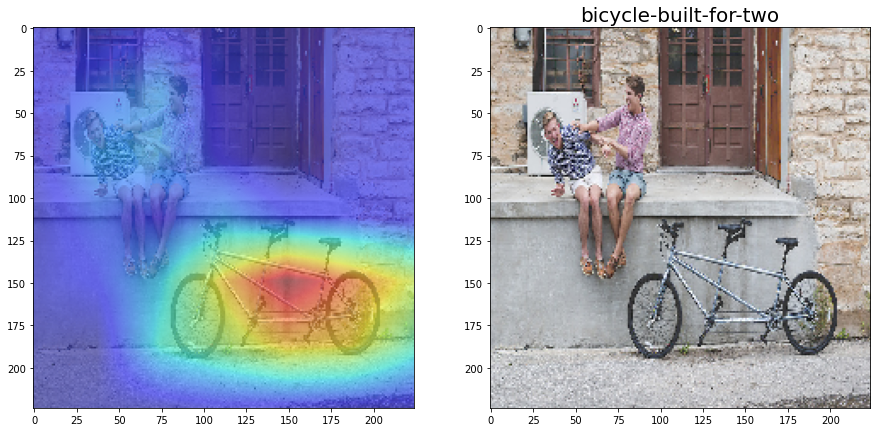

In [66]:
show_class_activation_map("tandem.jpg")

[('n03877845', 'palace', 0.65974975), ('n03781244', 'monastery', 0.26994136), ('n02980441', 'castle', 0.049794562), ('n03028079', 'church', 0.010355838), ('n03388043', 'fountain', 0.0031079515)]


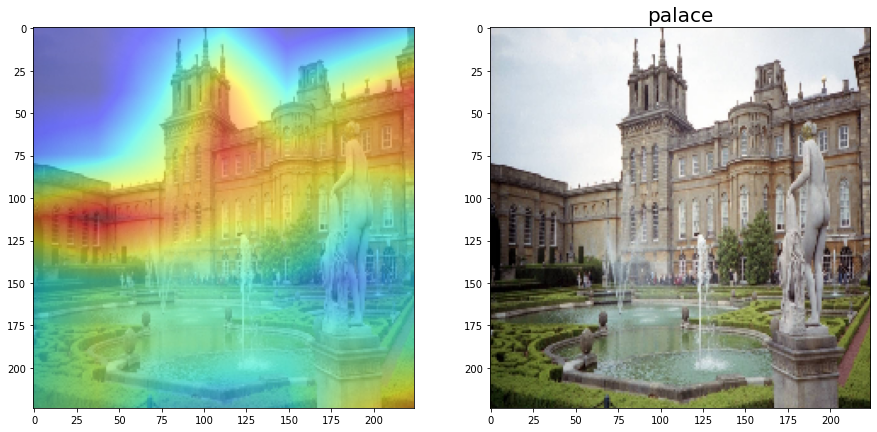

In [51]:
show_class_activation_map("palace.jpg")

[('n01582220', 'magpie', 0.9793636), ('n01534433', 'junco', 0.007629379), ('n01592084', 'chickadee', 0.0021376105), ('n01560419', 'bulbul', 0.001570099), ('n01824575', 'coucal', 0.0013635169)]


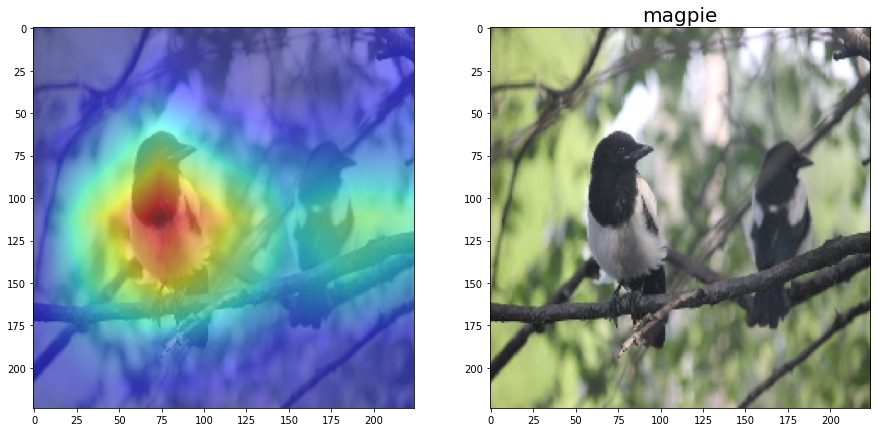

In [52]:
show_class_activation_map("magpie.jpg")

[('n01644373', 'tree_frog', 0.984511), ('n01644900', 'tailed_frog', 0.015204769), ('n01641577', 'bullfrog', 0.00026431162), ('n01694178', 'African_chameleon', 1.0375284e-05), ('n02177972', 'weevil', 3.3366964e-06)]


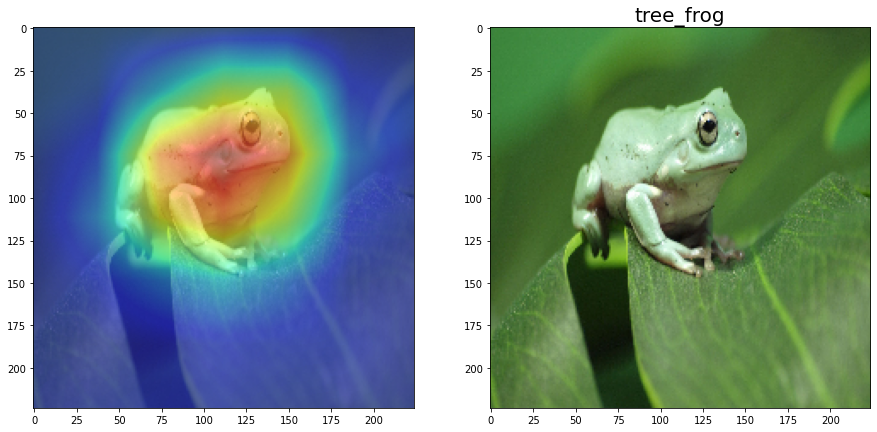

In [53]:
show_class_activation_map("tree_frog.jpg")

[('n02105162', 'malinois', 0.5151019), ('n02091244', 'Ibizan_hound', 0.10691329), ('n02106662', 'German_shepherd', 0.10561673), ('n03803284', 'muzzle', 0.06349511), ('n02108089', 'boxer', 0.034437414)]


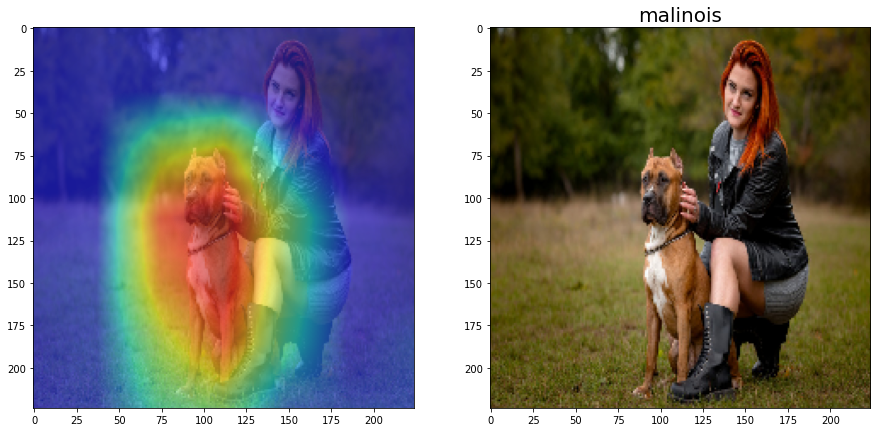

In [54]:
show_class_activation_map("dogs.jpg")

[('n03124043', 'cowboy_boot', 0.9996984), ('n03680355', 'Loafer', 0.00018323337), ('n03047690', 'clog', 8.8418645e-05), ('n04200800', 'shoe_shop', 2.530356e-05), ('n04254777', 'sock', 3.1786012e-06)]


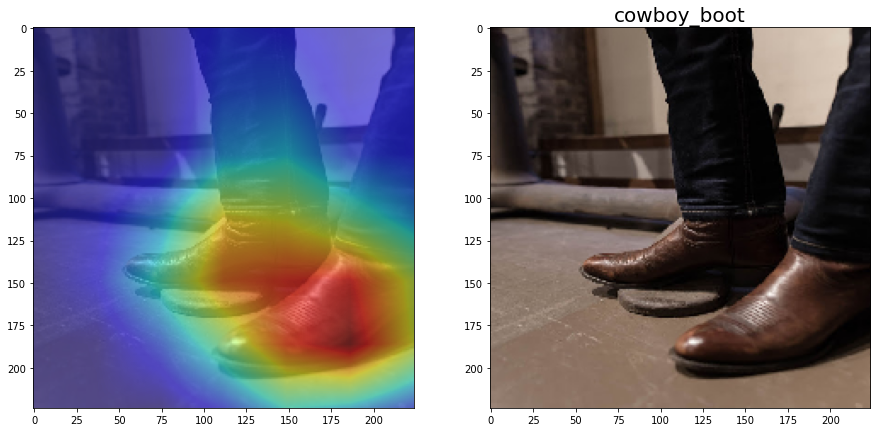

In [55]:
show_class_activation_map("cow_boy.jpg")

[('n01795545', 'black_grouse', 0.98962045), ('n01514668', 'cock', 0.007550083), ('n01514859', 'hen', 0.0017859732), ('n01582220', 'magpie', 0.00044261495), ('n01616318', 'vulture', 0.0001813779)]


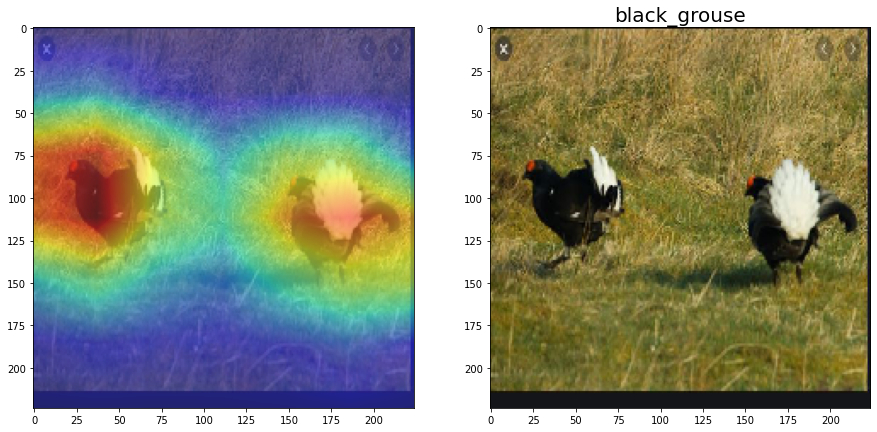

In [56]:
show_class_activation_map("black_.JPG")

[('n02488702', 'colobus', 0.9872573), ('n02484975', 'guenon', 0.006481832), ('n02483362', 'gibbon', 0.005295794), ('n02493509', 'titi', 0.00033541897), ('n02486261', 'patas', 0.00012155451)]


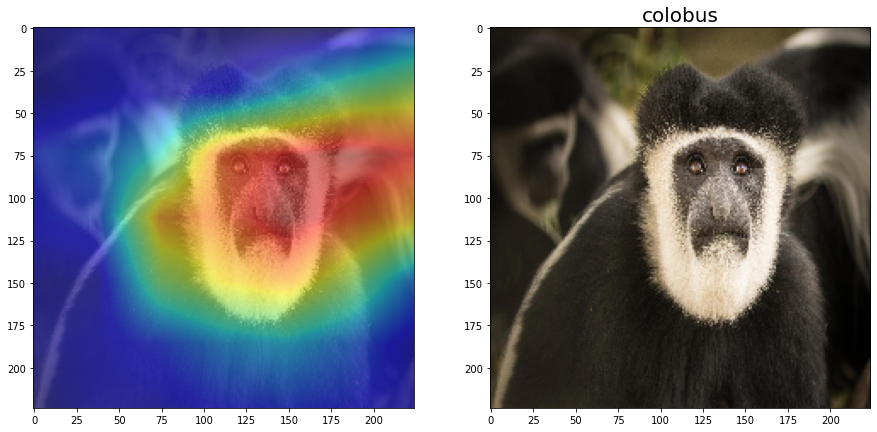

In [67]:
show_class_activation_map("colobus-monkey.jpg")